In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import os.path
import math

from os import getcwd
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import savemat, loadmat
import math
from scipy.fftpack import fft, ifft
from scipy.stats import zscore, f_oneway
#import samplerate
import multiprocessing as mp
from scipy.signal import resample
import random
import pyreadr
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score
import scipy
import matplotlib.patches as mpatches
import plotly
import plotly.graph_objs as go
import random

from random import sample


In [2]:
mer_loc = pd.read_csv('mer_loc.csv', index_col=0)

cue_unit = pd.read_csv('cue_unit.csv', index_col=0)
cue_unit.shape

(229, 15)

In [3]:
cue_only = []
cue_speech = []
for item in range(cue_unit.shape[0]):
    if cue_unit.iloc[item, 2] == "After":
        if cue_unit.iloc[item, 5] == "Before":
            cue_speech.append(item)
        elif cue_unit.iloc[item, 5] == "After":
            cue_speech.append(item)
        else:
            cue_only.append(item)
            
cue_only = mer_loc.iloc[cue_only].iloc[:, 10:13]
cue_speech = mer_loc.iloc[cue_speech].iloc[:, 10:13]

In [4]:
unique_stn_mni = np.array([[-14.98387934, -12.92955243,  -5.49369781],
       [-14.70173477, -12.72993921,  -6.9148277 ],
       [-14.61559584, -13.08360543,  -6.69066031],
       [-14.30137752, -15.52726452,  -6.05530294],
       [-14.03616376, -13.9636122 ,  -8.70867027],
       [-14.00005879, -14.74497848,  -8.96395878],
       [-13.73481012, -13.47723165,  -5.39605118],
       [-13.56196624, -15.93644309,  -7.66050696],
       [-13.37473971, -17.41903282,  -6.20454728],
       [-13.31060832, -12.20960832,  -5.93658854],
       [-13.29565498, -15.71861443,  -6.72678909],
       [-13.23565603, -15.46435028,  -8.16041817],
       [-13.18059202, -14.17237787,  -8.08707092],
       [-12.17040858, -14.08359043,  -8.36022743],
       [-12.03716398, -14.73622513,  -7.1264492 ],
       [-10.9304167 , -14.53749422,  -5.21299281]])

In [5]:
all_stn_loc = np.array([[-15.85495933, -13.87773007,  -5.48154735],
       [-15.75970059, -15.52843057,  -3.91598189],
       [-15.45374949, -13.91596863,  -2.19142176],
       [-15.33057044, -12.00136822,  -3.53626345],
       [-15.09191962, -14.85227888,  -4.1494432 ],
       [-15.06147772, -15.16765741,  -4.52474056],
       [-14.98387934, -12.92955243,  -5.49369781],
       [-14.8943997 , -13.35822986,  -5.91952819],
       [-14.70173477, -12.72993921,  -6.9148277 ],
       [-14.68005229, -12.27527199,  -2.27758418],
       [-14.61559584, -13.08360543,  -6.69066031],
       [-14.59649218, -14.65701456,  -5.97072405],
       [-14.59636093, -15.00058176,  -5.6006966 ],
       [-14.32557457, -10.64396426,  -3.49212286],
       [-14.30137752, -15.52726452,  -6.05530294],
       [-14.26770386, -17.0086002 ,  -6.57018546],
       [-14.23971126, -13.67744692,  -7.22565439],
       [-14.17383878, -16.52318564,  -7.58143299],
       [-14.10245858, -14.30157847,  -6.27494601],
       [-14.08623148, -15.17212554,  -7.97947962],
       [-14.03616376, -13.9636122 ,  -8.70867027],
       [-14.0351    , -15.88681722,  -7.61033244],
       [-14.00005879, -14.74497848,  -8.96395878],
       [-13.95199108, -16.48744141,  -7.69186734],
       [-13.73481012, -13.47723165,  -5.39605118],
       [-13.66072277, -13.84644438,  -4.73318022],
       [-13.60522992, -12.86736622,  -7.83710678],
       [-13.56196624, -15.93644309,  -7.66050696],
       [-13.53619498, -12.68375731,  -2.52328649],
       [-13.47219453, -10.92537886,  -3.88526933],
       [-13.37473971, -17.41903282,  -6.20454728],
       [-13.34912064, -15.15720507,  -7.20085173],
       [-13.31060832, -12.20960832,  -5.93658854],
       [-13.29565498, -15.71861443,  -6.72678909],
       [-13.27247745, -12.35859743,  -9.2916182 ],
       [-13.23565603, -15.46435028,  -8.16041817],
       [-13.20585954, -14.1125233 ,  -7.97694746],
       [-13.18059202, -14.17237787,  -8.08707092],
       [-13.1687181 , -11.73856359,  -2.67555121],
       [-13.15547606, -16.01975691,  -6.94180215],
       [-13.0925569 , -17.27505173,  -7.15856983],
       [-13.04574118, -14.51793201,  -9.19407432],
       [-12.94279903, -12.86965447,  -5.31167934],
       [-12.82686268, -12.68845749,  -4.64480731],
       [-12.8070096 , -14.286484  ,  -5.51563591],
       [-12.78109919, -12.24283462,  -6.42813647],
       [-12.76903476, -12.5283084 ,  -6.83704378],
       [-12.59180804, -12.58821619,  -6.243006  ],
       [-12.50574207, -13.28519606,  -6.64431106],
       [-12.29581701, -10.37753887,  -2.80739253],
       [-12.17040858, -14.08359043,  -8.36022743],
       [-12.03716398, -14.73622513,  -7.1264492 ],
       [-12.02651228, -13.49117069,  -8.28205349],
       [-11.99330261, -14.28624276,  -8.35341644],
       [-11.75347275, -13.84519966,  -8.17064975],
       [-11.71777002, -14.78595841,  -0.52771334],
       [-11.69656193, -15.35188384,  -6.42641195],
       [-11.60017268, -12.77118479,  -6.9900504 ],
       [-11.54411876, -13.03030683,  -1.7497324 ],
       [-11.5280523 , -10.58166216,  -3.48880226],
       [-11.38888865, -15.0514734 ,  -7.52371949],
       [-11.35954709, -14.69268809,  -6.24989271],
       [-11.32239196, -11.94847167,  -5.28113153],
       [-11.25106116, -15.18385367, -10.06749914],
       [-11.22062074, -16.66129379,  -8.29462844],
       [-11.21630762, -13.57368414,  -7.12842467],
       [-11.09661785, -16.26189556,  -3.96439322],
       [-11.04810579, -14.42817653,  -8.35868245],
       [-10.9304167 , -14.53749422,  -5.21299281],
       [-10.85594408, -12.20272398,  -6.4373636 ],
       [ -9.87386991, -13.44061331,  -7.88405167],
       [ -9.63474126, -12.85605254,  -1.27349904],
       [ -9.43754869, -14.78822004,  -9.83036327],
       [ -9.03620676, -14.361395  ,  -4.73750039]])

In [6]:
cue_only.iloc[0]

MNI_X   -12.804232
MNI_Y   -12.914742
MNI_Z    -5.856770
Name: 49, dtype: float64

In [7]:
def math_dist(sample1, sample2):
    return math.sqrt(sum((s1 - s2) ** 2 for s1, s2 in zip(sample1, sample2)))

In [8]:
math_dist(cue_only.iloc[0], unique_stn_mni[0])

2.209729044864098

In [9]:
all_dist = []
for item in range(cue_only.shape[0]):
    for i2 in range(all_stn_loc.shape[0]):
        all_dist.append(math_dist(cue_only.iloc[item], all_stn_loc[i2]))
        
all_dist = np.array(all_dist)
all_dist.shape

(1776,)

In [10]:
ep_loc_dist = []
for item in range(cue_only.shape[0]):
    for i2 in range(unique_stn_mni.shape[0]):
        ep_loc_dist.append(math_dist(cue_only.iloc[item], unique_stn_mni[i2]))
        
ep_loc_dist = np.array(ep_loc_dist)
ep_loc_dist.shape

(384,)

In [11]:
ep_loc_dist.mean()
all_dist.mean()

3.482896670314325

4.341025960017108

In [12]:
sample_all_dist = []
for item in range(10000):
    sample_all_dist.append(np.median(sample(list(all_dist), ep_loc_dist.shape[0])))

(array([  36.,  327.,  780., 1109., 2483., 2897., 1835.,  456.,   72.,
           5.]),
 array([3.53760865, 3.63437023, 3.7311318 , 3.82789338, 3.92465495,
        4.02141652, 4.1181781 , 4.21493967, 4.31170125, 4.40846282,
        4.5052244 ]),
 <BarContainer object of 10 artists>)

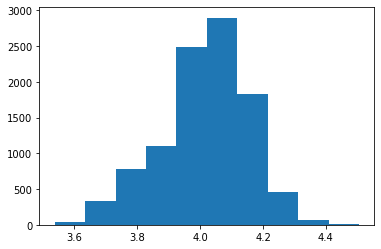

In [13]:
plt.hist(sample_all_dist)

In [14]:
sample_ep_loc_dist = []
for item in range(100):
    sample_ep_loc_dist.append(np.mean(sample(list(ep_loc_dist),100)))

(array([10., 10., 23., 20., 15., 11.,  8.,  2.,  0.,  1.]),
 array([3.29025369, 3.35191621, 3.41357873, 3.47524125, 3.53690377,
        3.59856629, 3.66022881, 3.72189133, 3.78355385, 3.84521637,
        3.90687889]),
 <BarContainer object of 10 artists>)

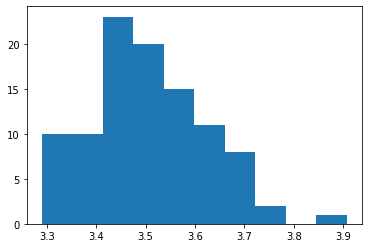

In [15]:
plt.hist(sample_ep_loc_dist)

In [16]:
np.median(ep_loc_dist)

3.358492184104022

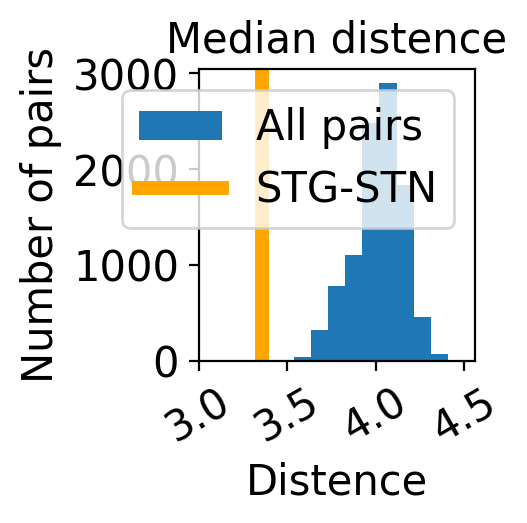

In [16]:
fig, axs = plt.subplots(1, 1, figsize=(2.5, 2.5), dpi=200, constrained_layout=1)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

axs.hist(sample_all_dist, label='All pairs')
axs.axvline(np.median(ep_loc_dist), color='orange', linewidth=5, label='STG-STN')
axs.set_xlabel('Distence', fontsize=15)
axs.set_ylabel('Number of pairs', fontsize=15)
axs.set_xticks(np.linspace(3, 4.5, 4))
xticklabel = axs.get_xticks()*10
axs.set_xticklabels(xticklabel.astype(int)/10, fontsize=15, rotation=30)
axs.set_yticklabels(axs.get_yticks().astype(int), fontsize=15)
plt.legend(fontsize=15)
axs.set_title('Median distence', fontsize=15)
plt.savefig("../plots/fig3k.svg", format = 'svg', dpi=200);


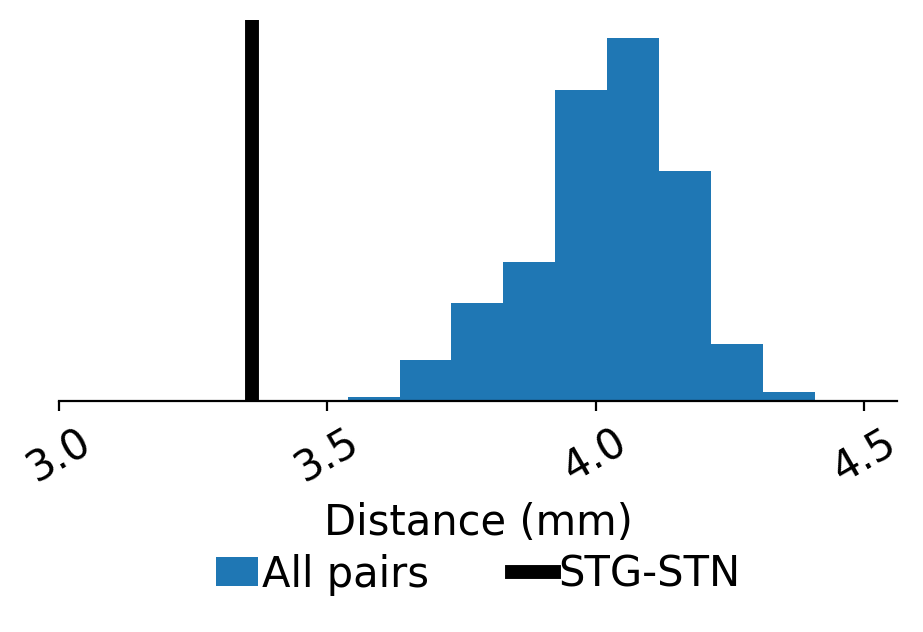

In [17]:
fig, axs = plt.subplots(1, 1, figsize=(4.5, 3), dpi=200, constrained_layout=1)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

axs.hist(sample_all_dist, label='All pairs')
axs.axvline(np.median(ep_loc_dist), color='k', linewidth=5, label='STG-STN')
axs.set_xlabel('Distance (mm)', fontsize=15)
#axs.set_ylabel('Number of pairs', fontsize=15)
axs.set_xticks(np.linspace(3, 4.5, 4))
xticklabel = axs.get_xticks()*10
axs.set_xticklabels(xticklabel.astype(int)/10, fontsize=15, rotation=30)
#axs.set_yticklabels(axs.get_yticks().astype(int), fontsize=15)
axs.set_yticks([])
plt.legend(fontsize=15, frameon=False, ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.3), 
           handletextpad=0.1, handlelength=1, labelspacing=0.25)
#axs.set_title('Median distence', fontsize=15)
sns.despine(ax=axs, top=True, right=True, left=True, bottom=False)

plt.show();

In [24]:
mean = np.mean(sample_all_dist)
std = np.std(sample_all_dist)
z = (np.median(ep_loc_dist) - mean) / std
p_one_sided_left = stats.norm.cdf(z)            # P(X ≤ value)
p_one_sided_left

5.914726224242422e-07

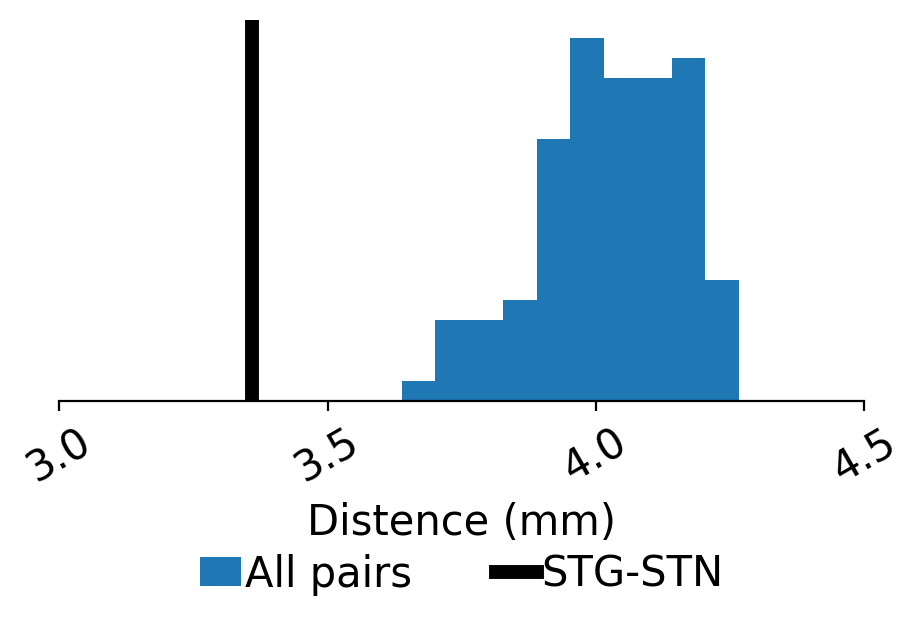

In [17]:
fig, axs = plt.subplots(1, 1, figsize=(4.5, 3), dpi=200, constrained_layout=1)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

axs.hist(sample_all_dist, label='All pairs')
axs.axvline(np.median(ep_loc_dist), color='k', linewidth=5, label='STG-STN')
axs.set_xlabel('Distence (mm)', fontsize=15)
#axs.set_ylabel('Number of pairs', fontsize=15)
axs.set_xticks(np.linspace(3, 4.5, 4))
xticklabel = axs.get_xticks()*10
axs.set_xticklabels(xticklabel.astype(int)/10, fontsize=15, rotation=30)
#axs.set_yticklabels(axs.get_yticks().astype(int), fontsize=15)
axs.set_yticks([])
plt.legend(fontsize=15, frameon=False, ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.3), 
           handletextpad=0.1, handlelength=1, labelspacing=0.25)
#axs.set_title('Median distence', fontsize=15)
sns.despine(ax=axs, top=True, right=True, left=True, bottom=False)

plt.show();

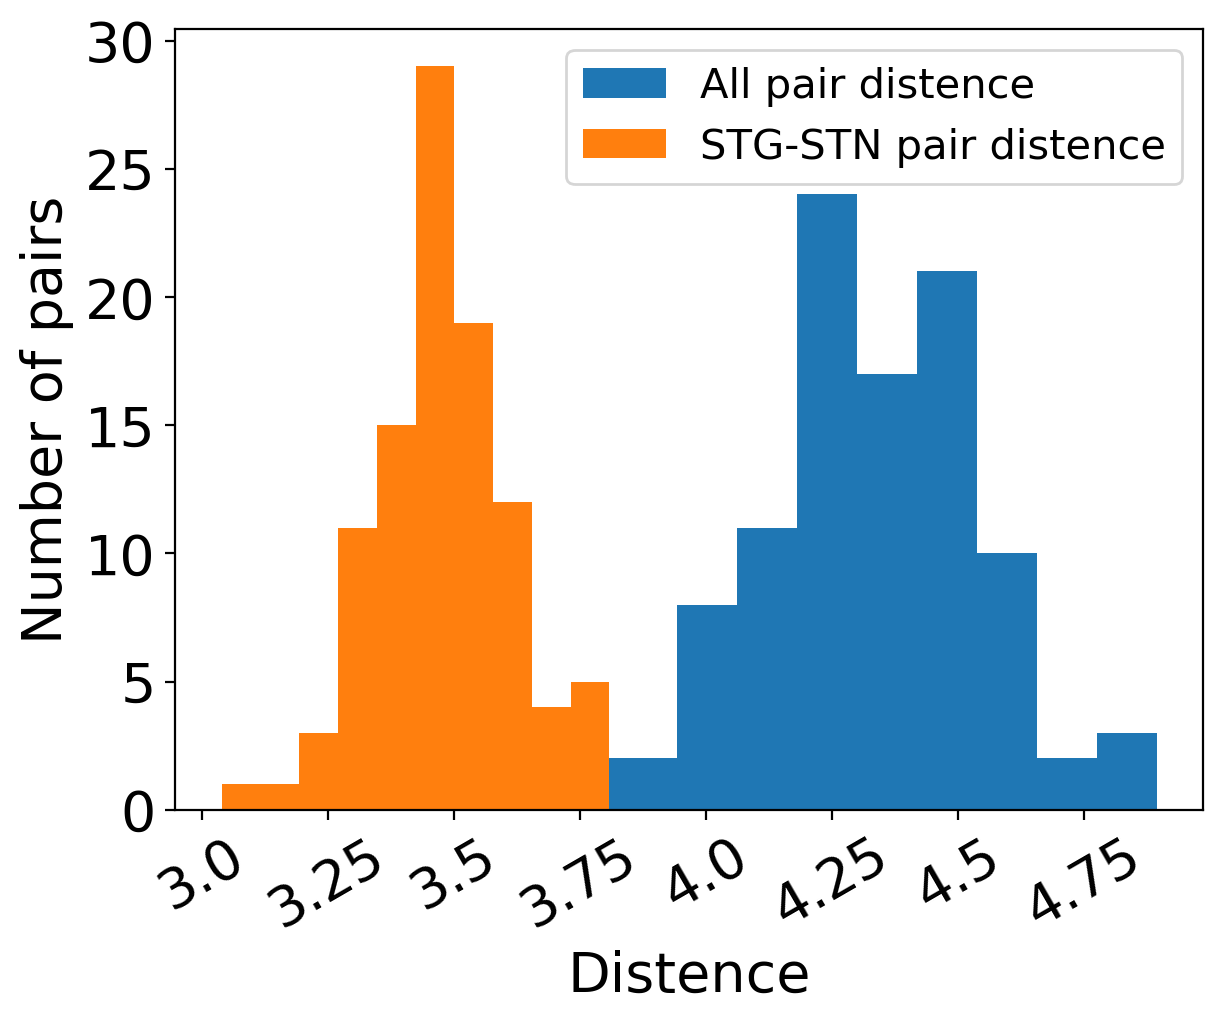

In [34]:
fig, axs = plt.subplots(1, 1, figsize=(6, 5), dpi=200, constrained_layout=1)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

axs.hist(sample_all_dist, label='All pair distence')
axs.hist(sample_ep_loc_dist, label='STG-STN pair distence')
axs.set_xlabel('Distence', fontsize=20)
axs.set_ylabel('Number of pairs', fontsize=20)
axs.set_xticklabels(axs.get_xticks(), fontsize=20, rotation=30)
axs.set_yticklabels(axs.get_yticks().astype(int), fontsize=20)
plt.legend(fontsize=15)

plt.show();

(array([29., 45., 55., 62., 48., 61., 34., 23., 16., 11.]),
 array([0.62670941, 1.29820575, 1.96970209, 2.64119843, 3.31269477,
        3.98419111, 4.65568745, 5.32718379, 5.99868014, 6.67017648,
        7.34167282]),
 <BarContainer object of 10 artists>)

(array([ 85., 279., 388., 354., 261., 165., 119.,  73.,  43.,   9.]),
 array([ 0.27811212,  1.37768069,  2.47724927,  3.57681785,  4.67638642,
         5.775955  ,  6.87552357,  7.97509215,  9.07466072, 10.1742293 ,
        11.27379788]),
 <BarContainer object of 10 artists>)

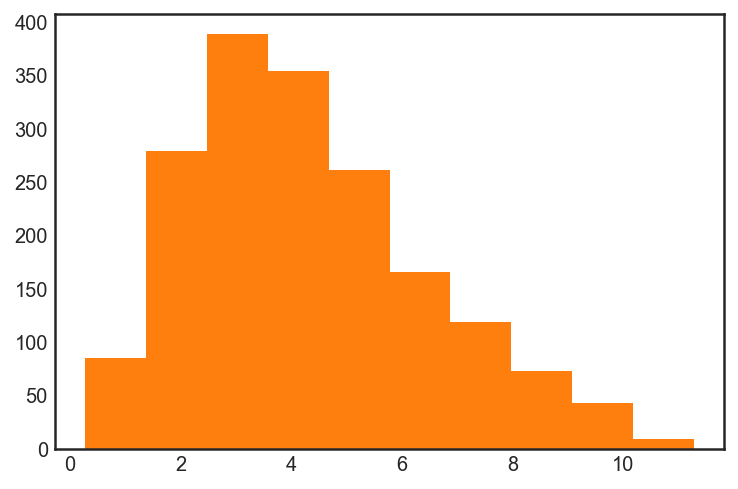

In [22]:
plt.hist(ep_loc_dist)
plt.hist(all_dist)

In [26]:
sample(list(all_dist), ep_loc_dist.shape[0])

[3.695852330730292,
 5.7736478537030385,
 8.286941058656128,
 10.080060756606498,
 7.1462918023802215,
 3.400362689334926,
 4.17157721719398,
 2.483544449774721,
 2.4329923305437324,
 4.301858800016244,
 9.197802625549587,
 2.5401604136074942,
 3.3767064266123508,
 3.062517123407134,
 4.001902810025494,
 0.5642318134480518,
 3.9112297283928004,
 5.772818751257565,
 5.2688581583567355,
 2.56229458881715,
 7.934872126490397,
 5.66746356985204,
 7.539001130725635,
 3.470506930702969,
 1.6169589248474132,
 4.322269620151317,
 4.395090767513746,
 3.4949717983784145,
 5.373834849326461,
 3.690270183795061,
 3.728015763144653,
 4.628997807850622,
 2.931432374608996,
 6.82058526255286,
 6.626117614085106,
 7.39248087654754,
 5.502396381490202,
 0.8797627961323365,
 8.951052043596729,
 2.005785391735355,
 6.061429263104055,
 2.505549765169329,
 1.7119910593701826,
 4.201584437085992,
 4.6793509666776005,
 4.095406143990086,
 3.1510229443463333,
 5.160097490518928,
 2.5822172977906774,
 4.269165

In [24]:
ep_loc_dist.shape

(384,)

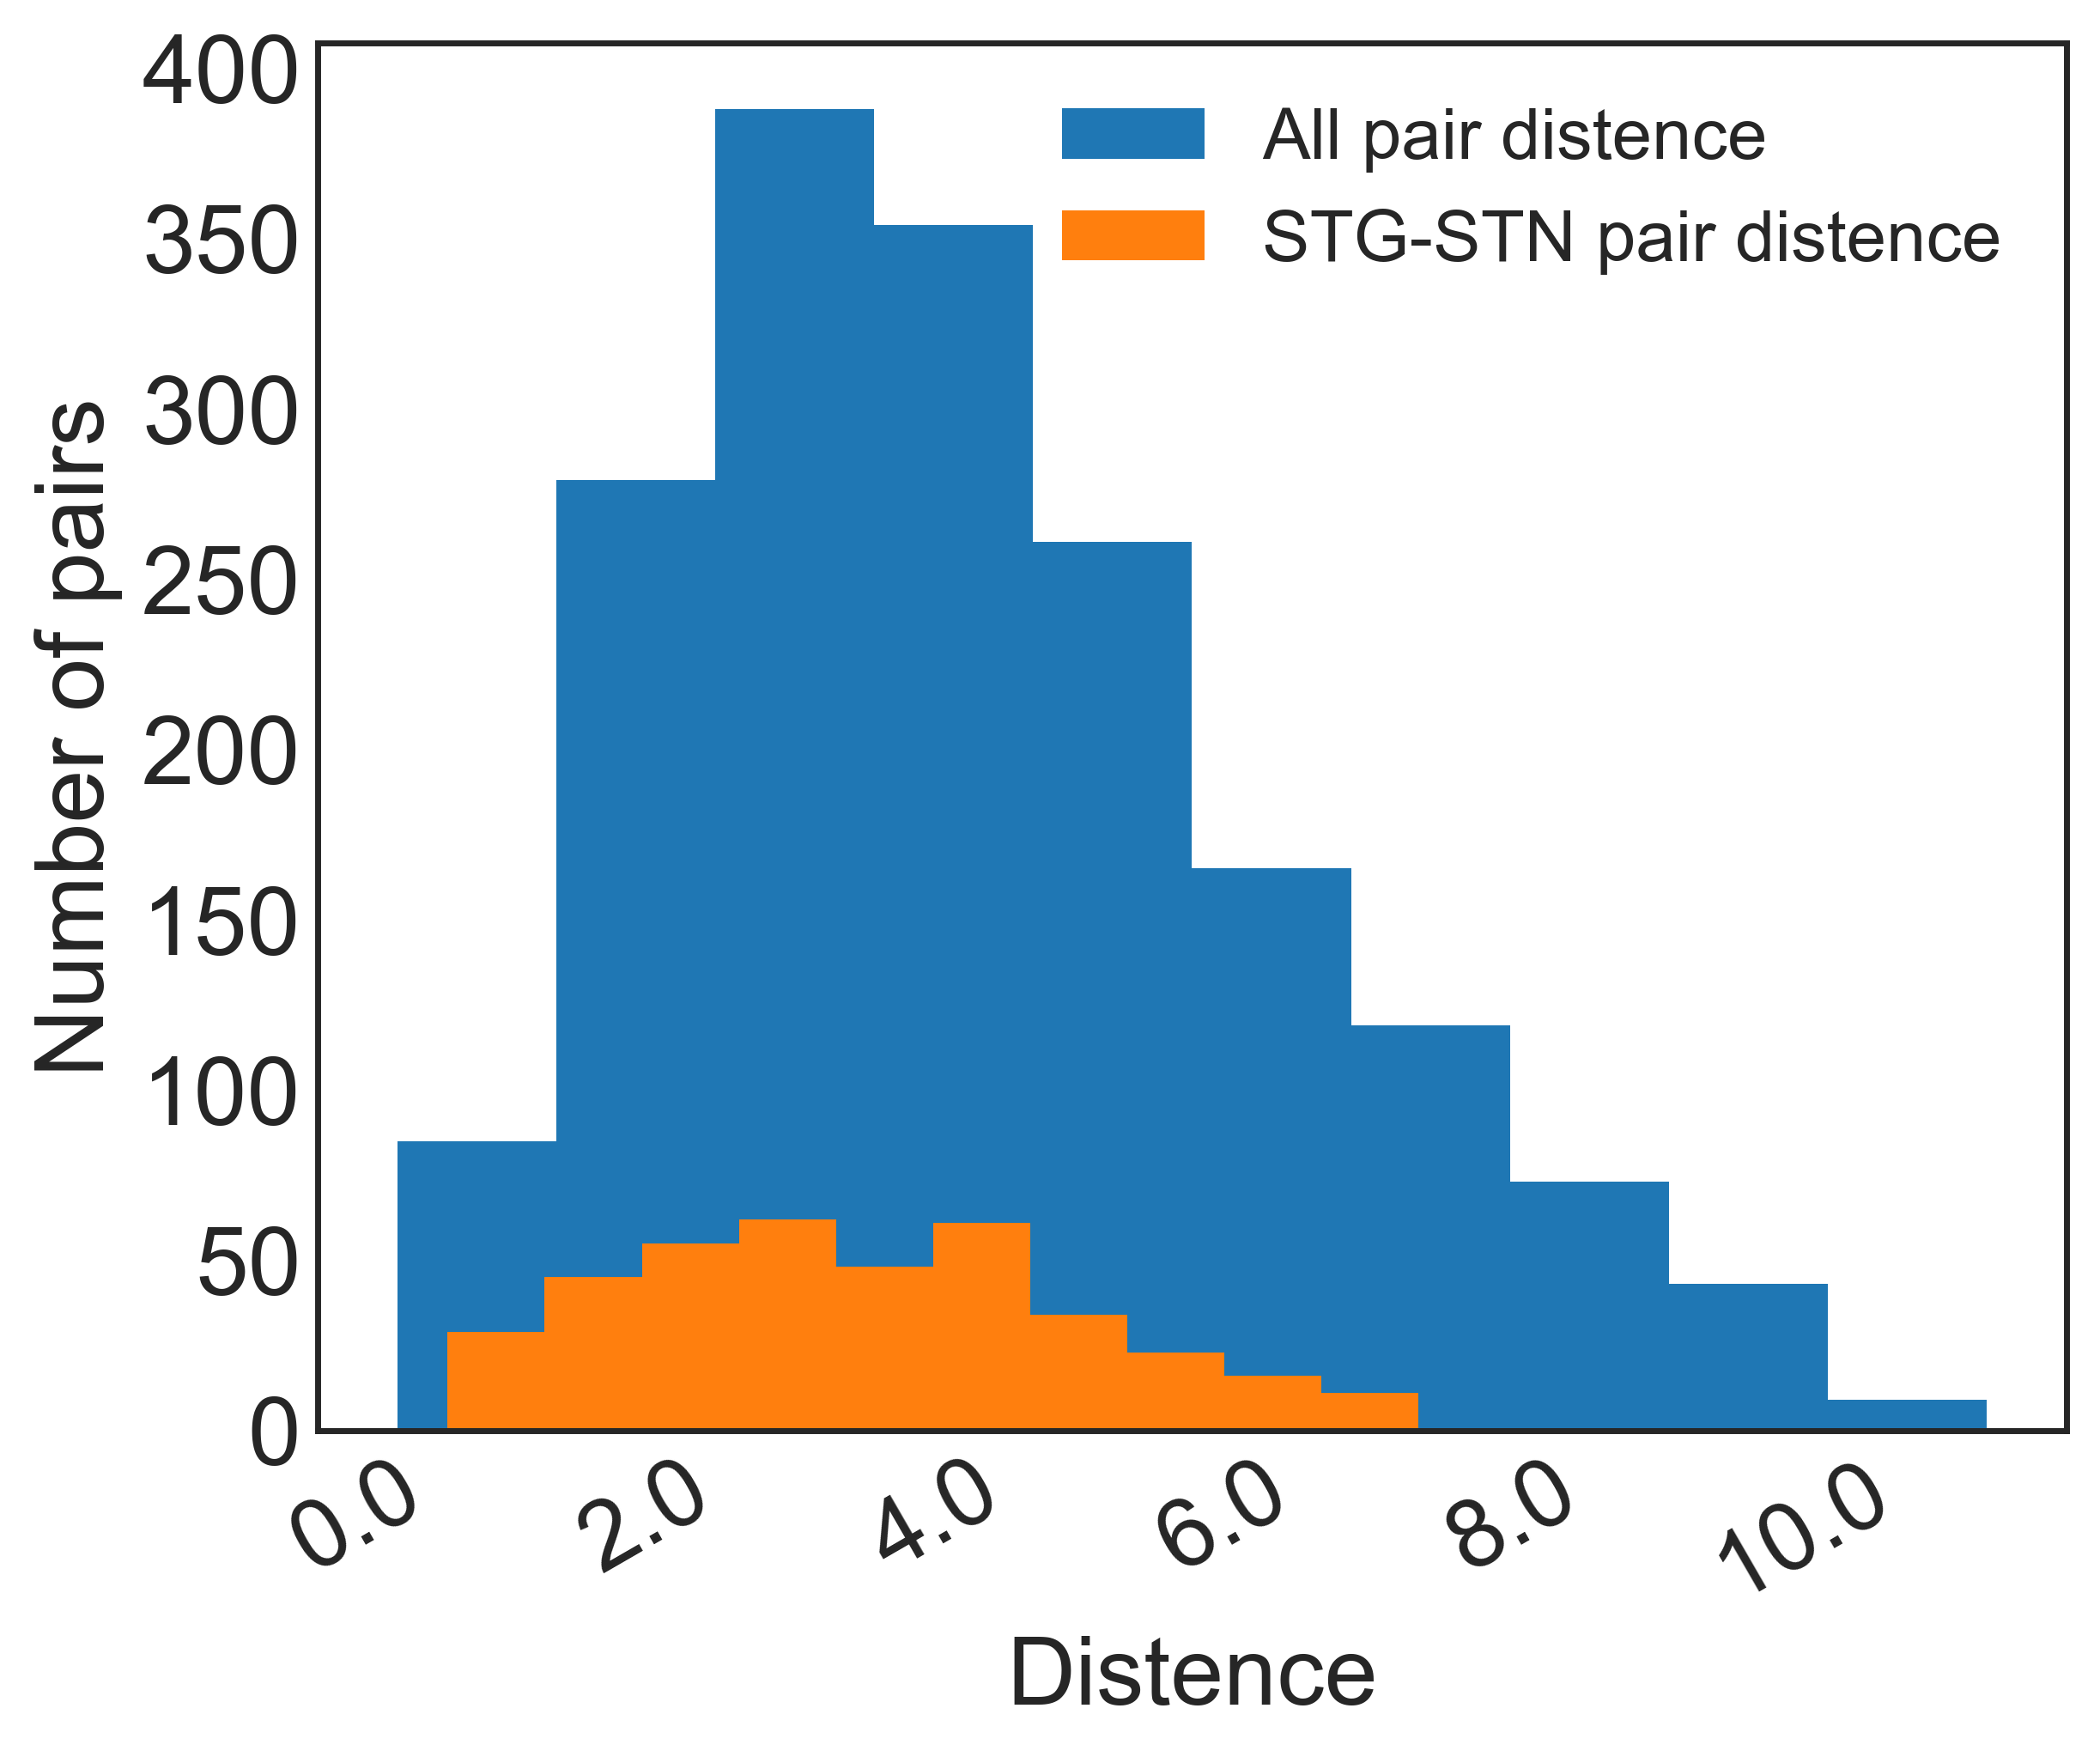

In [29]:
fig, axs = plt.subplots(1, 1, figsize=(6, 5), dpi=200, constrained_layout=1)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

axs.hist(all_dist, label='All pair distence')
axs.hist(ep_loc_dist, label='STG-STN pair distence')
axs.set_xlabel('Distence', fontsize=20)
axs.set_ylabel('Number of pairs', fontsize=20)
axs.set_xticklabels(axs.get_xticks(), fontsize=20, rotation=30)
axs.set_yticklabels(axs.get_yticks().astype(int), fontsize=20)
plt.legend(fontsize=15)

plt.show();

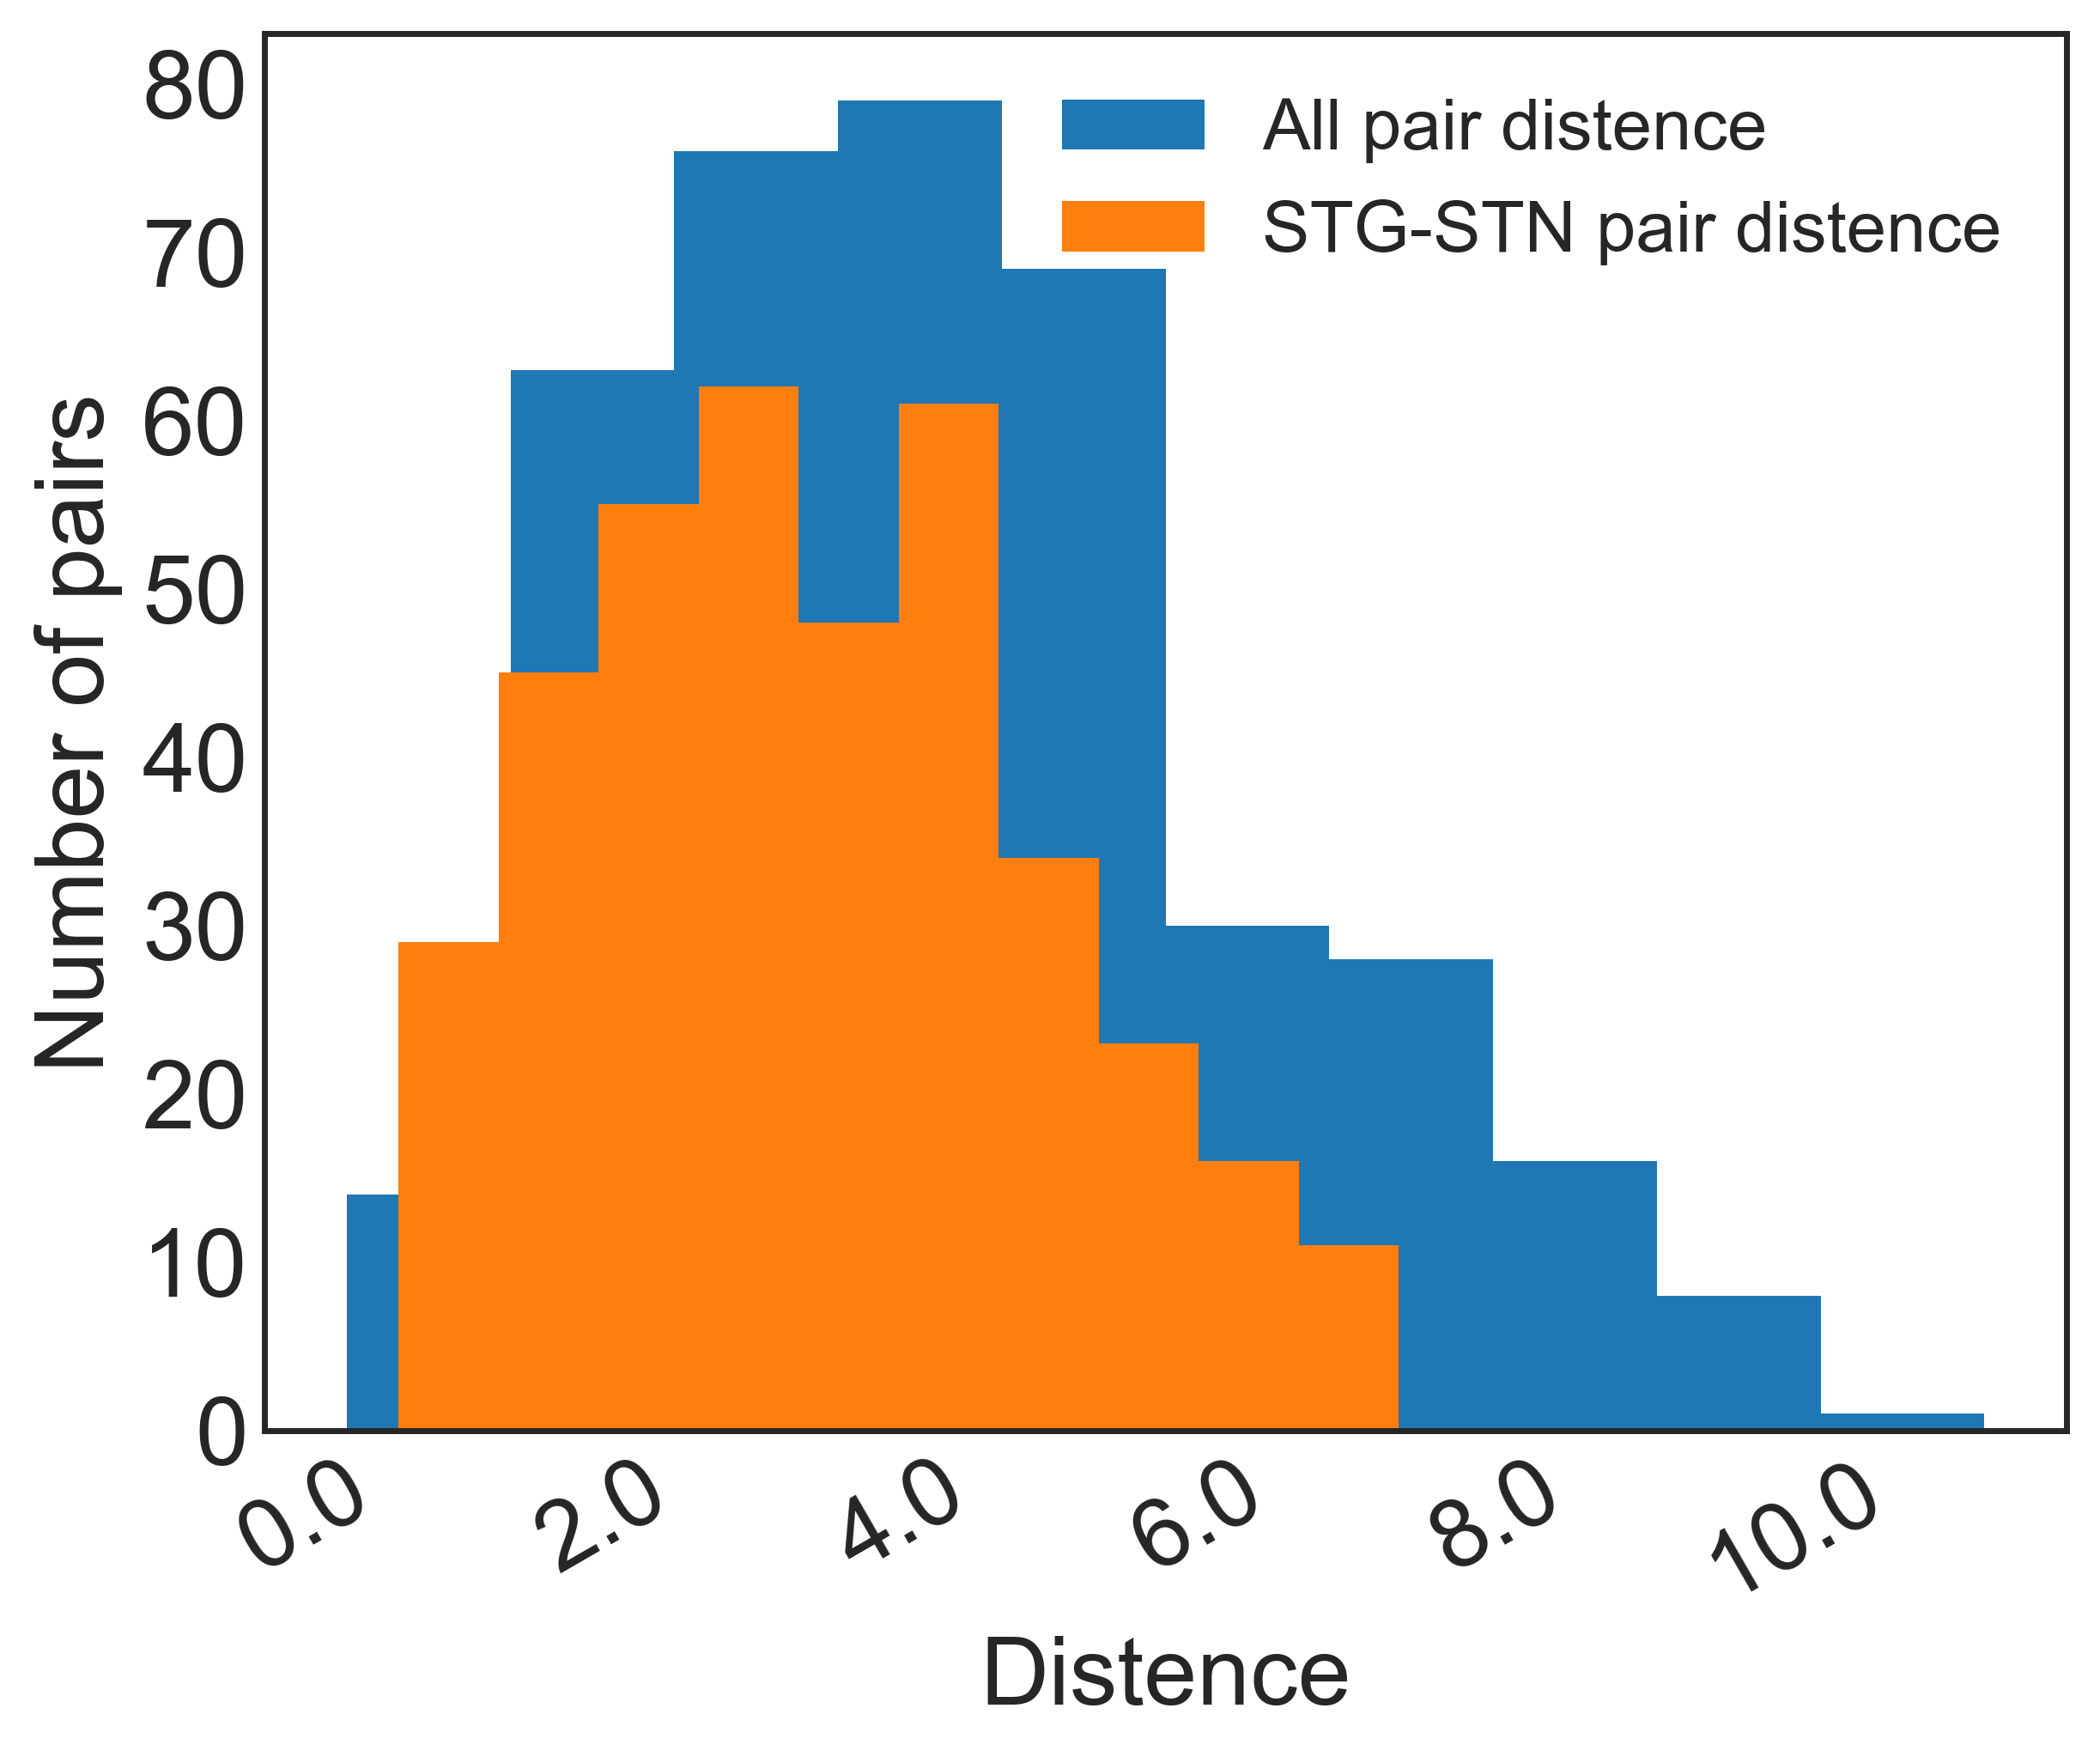

In [28]:
fig, axs = plt.subplots(1, 1, figsize=(6, 5), dpi=200, constrained_layout=1)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

axs.hist(sample(list(all_dist), ep_loc_dist.shape[0]), label='All pair distence')
axs.hist(ep_loc_dist, label='STG-STN pair distence')
axs.set_xlabel('Distence', fontsize=20)
axs.set_ylabel('Number of pairs', fontsize=20)
axs.set_xticklabels(axs.get_xticks(), fontsize=20, rotation=30)
axs.set_yticklabels(axs.get_yticks().astype(int), fontsize=20)
plt.legend(fontsize=15)

plt.show();